# Image Fragmentation

Image fragmentation is necessary to be able to run any image size (larger than `512 px` in `width` or `height`) into the Neural Network.

In [17]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## 1. Reading an Image

(576, 720, 3)


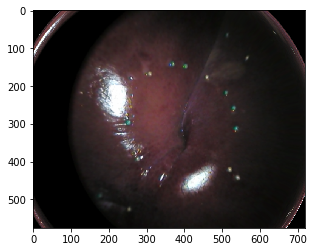

In [18]:
idx = '2'
image = '../tmi_dataset/Stereo_SD_d_all/Stereo_SD_d_all_{idx}/Stereo_SD_d_all_{idx}_IMG_REC_left.bmp'.format(idx=idx)
image = plt.imread(image)

print(image.shape)
plt.imshow(image)

## 2. Deviding the Image

Number of devisions will be `5` Horiszontally and `3` Vertically. We calculate how much bigger the image is from standard `512 x 512` input image.

`num_of_layers` should be the same resolution as the image but with only `1` channel.

`Stacked_images` will be with the shape of `? x 512 x 512 x 3`, where `?` would be the length of cropped images (here it would be 15).

In [19]:
divisions = (5, 3)
num_of_layers = np.zeros(shape=(image.shape[0], image.shape[1]))

stacked_images = []

print(num_of_layers.shape)

(576, 720)


In [20]:
extendedWidth = image.shape[1] - 512
extendedHeight = image.shape[0] - 512

(extendedWidth, extendedHeight)

(208, 64)

In [21]:
if extendedWidth % (divisions[0] - 1) == 0 and extendedHeight % (divisions[1] - 1) == 0:
    widthJump = extendedWidth // (divisions[0] - 1)
    heightJump = extendedHeight // (divisions[1] - 1)
else:
    raise ValueError('Not Dividable!')

(widthJump, heightJump)

(52, 32)

Here we create the cut sizes.

In [22]:
horizontalCuts = [(0+i*widthJump, 512+i*widthJump) for i in range(0, divisions[0])]
verticalCuts = [(0+i*heightJump, 512+i*heightJump) for i in range(0, divisions[1])]

cuts = []
for i in horizontalCuts:
    for j in verticalCuts:
        cuts.append((j, i))
print(cuts)
print(len(cuts))

[((0, 512), (0, 512)), ((32, 544), (0, 512)), ((64, 576), (0, 512)), ((0, 512), (52, 564)), ((32, 544), (52, 564)), ((64, 576), (52, 564)), ((0, 512), (104, 616)), ((32, 544), (104, 616)), ((64, 576), (104, 616)), ((0, 512), (156, 668)), ((32, 544), (156, 668)), ((64, 576), (156, 668)), ((0, 512), (208, 720)), ((32, 544), (208, 720)), ((64, 576), (208, 720))]
15


Hear we create the stacked images and save the layers each pixel participates in.

In [23]:
for c in cuts:
    chunk = image[c[0][0]:c[0][1], c[1][0]:c[1][1]]
    stacked_images.append(chunk)
    num_of_layers[c[0][0]:c[0][1], c[1][0]:c[1][1]] += 1

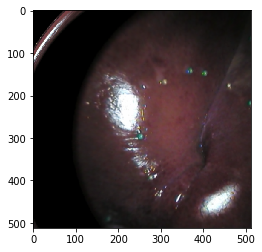

In [24]:
plt.imshow(stacked_images[0])

In [25]:
stacked_images = np.array(stacked_images)
stacked_images.shape

(15, 512, 512, 3)

(15.0, 1.0)

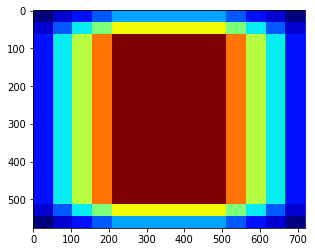

In [26]:
plt.imshow(num_of_layers, cmap='jet')
(np.max(num_of_layers), np.min(num_of_layers))

## 3. Processing Images

All the images should converted into 1 channel image. This step will be done by neural network but here we will convert the RGB images into Gray Scale Images for simplicity.

In [27]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [28]:
gray_scale = []
for image in stacked_images:
    gray_scale.append(rgb2gray(image))
result = np.array(gray_scale)

In [29]:
result.shape

(15, 512, 512)

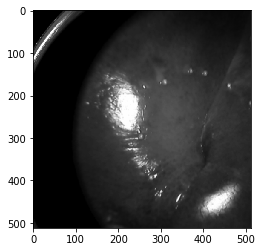

In [30]:
plt.imshow(result[0], cmap='gray')

## 4. Connecting Images

0 ((0, 512), (0, 512))
1 ((32, 544), (0, 512))
2 ((64, 576), (0, 512))
3 ((0, 512), (52, 564))
4 ((32, 544), (52, 564))
5 ((64, 576), (52, 564))
6 ((0, 512), (104, 616))
7 ((32, 544), (104, 616))
8 ((64, 576), (104, 616))
9 ((0, 512), (156, 668))
10 ((32, 544), (156, 668))
11 ((64, 576), (156, 668))
12 ((0, 512), (208, 720))
13 ((32, 544), (208, 720))
14 ((64, 576), (208, 720))


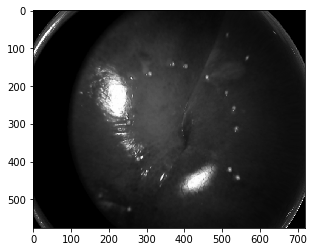

In [31]:
recreated_image = np.zeros(shape=num_of_layers.shape)

for idx, c in enumerate(cuts):
    print(idx, c)
    recreated_image[c[0][0]:c[0][1], c[1][0]:c[1][1]] += result[idx]

recreated_image = np.divide(recreated_image, num_of_layers)

plt.imshow(recreated_image, cmap='gray')